<a href="https://www.kaggle.com/code/saswattulo/logistic-regression-from-scratch?scriptVersionId=220695109" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 📊 Logistic Regression from Scratch

## 🔥 Introduction
### Logistic regression is a fundamental machine learning algorithm used for binary classification. It predicts the target that a given input belongs to a particular class. Unlike linear regression, logistic regression uses the `sigmoid activation function` to ensure the output is between 0️ and 1️, making it ideal for classification tasks

## Why Logistic Regression?
### - **Simple yet effective**: Works well for linearly separable data.
### - **Interpretable**: Coefficients indicate the importance of each feature.
### - **Probabilistic output**: Provides a probability score instead of a hard classification.
### - **Widely used**: Forms the foundation for more complex models like neural networks.


## Mathematical Intuition
### Sigmoid Function
Logistic regression relies on the **sigmoid function**, defined as:
$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$
where \( z = Xw + b \) is a linear combination of input features and their respective weights.

The sigmoid function maps any real number to a range between 0 and 1, representing the probability that an input belongs to class 1.

### Loss Function
We use **binary cross-entropy loss** to measure how well the model predicts:
$$ L = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] $$
where:
- \( y_i \) is the true label (0 or 1)
- \( \hat{y}_i \) is the predicted probability
- \( N \) is the number of samples

### Gradient Descent Optimization
To minimize the loss, we update weights using **gradient descent**:
$$ w := w - \alpha \frac{\partial L}{\partial w} $$
$$ b := b - \alpha \frac{\partial L}{\partial b} $$
where \( \alpha \) is the learning rate.

## Implementation
The implementation follows these steps:
### 1. **Initialize weights and bias**
### 2. **Compute predictions using the sigmoid function**
### 3. **Calculate loss using binary cross-entropy**
### 4. **Compute gradients and update parameters**
### 5. **Repeat for multiple epochs until convergence**

## Training the Model
### - We initialize the model with a learning rate and number of epochs.
### - The model iteratively updates weights to minimize the loss.
### - Finally, we evaluate the model using accuracy and visualization.

In [1]:
# importing all required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression # to compare performance of our model
from sklearn.metrics import log_loss, accuracy_score, classification_report
from matplotlib.colors import ListedColormap

In [2]:
class LogisticRegression:
    """
    Logistic Regression implementation from scratch using gradient descent.
    
    Attributes:
        lr (float): Learning rate for gradient descent.
        epochs (int): Number of iterations for training.
        weights (np.array): Model weights.
        bias (float): Model bias.
        losses (list): Stores loss values for each epoch.
    """
    def __init__(self, lr=0.001, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.losses = []
    
    def _gd(self, sample_size, y_pred, y_true, X):
        """Performs gradient descent to update weights and bias."""
        self.dw = (-1/sample_size) * np.dot(X.T, (y_true - y_pred))
        self.dc = (-1/sample_size) * np.sum(y_true - y_pred)
        self.weights -= self.lr * self.dw
        self.bias -= self.lr * self.dc
    
    def compute_loss(self, y_true, y_pred):
        """Computes binary cross-entropy loss."""
        n_samples = y_true.shape[0]
        loss = - (1 / n_samples) * np.sum(
            y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15)
        )
        return loss
    
    def sigmoid(self, z):
        """Applies the sigmoid function."""
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        """Trains the logistic regression model using gradient descent."""
        sample_size, features = X.shape
        self.weights = np.zeros(features)
        self.bias = 0
        
        for _ in range(self.epochs):
            z = X.dot(self.weights) + self.bias
            y_pred = self.sigmoid(z)
            loss = self.compute_loss(y, y_pred)
            self.losses.append(loss)
            self._gd(sample_size, y_pred, y, X)
    
    def predict_proba(self, X):
        """Returns the probability estimates for input features."""
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)
    
    def predict(self, X):
        """Returns binary class predictions (0 or 1) based on probability threshold."""
        probabilities = self.predict_proba(X)
        return (probabilities >= 0.5).astype(int)

Predicted classes: [0 1 1 1 1]
Predicted probabilities: [0.38261066 0.56290379 0.72797896 0.84759095 0.92036139]


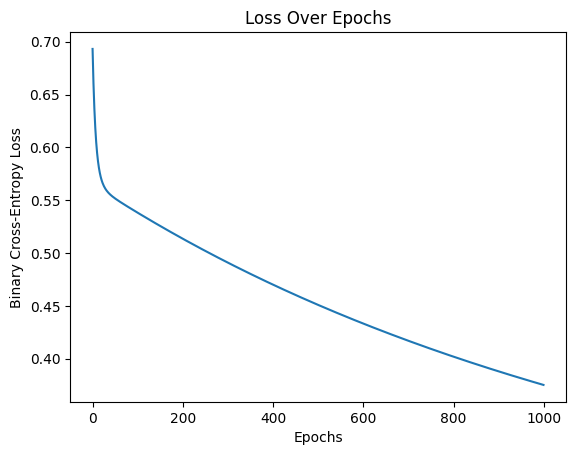

In [3]:
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])  # Labels (0 or 1)

# Create and train the logistic regression model
model = LogisticRegression(lr=0.01, epochs=1000)
model.fit(X, y)

# Make predictions
predictions = model.predict(X)
print("Predicted classes:", predictions)
print("Predicted probabilities:", model.predict_proba(X))

plt.plot(model.losses)
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.show()

In [4]:
# Generate synthetic dataset
X, y = make_classification(n_samples=10000, n_features=2, n_classes=2, random_state=42, n_informative=2, n_redundant=0)

In [5]:
# Train Custom Logistic Regression
custom_model = LogisticRegression(lr=0.1, epochs=1000)
custom_model.fit(X, y)
custom_probabilities = custom_model.predict_proba(X)
custom_predictions = custom_model.predict(X)
custom_loss = log_loss(y, custom_probabilities)

In [6]:
# Train scikit-learn Logistic Regression
sklearn_model = SklearnLogisticRegression(max_iter=1000)
sklearn_model.fit(X, y)
sklearn_probabilities = sklearn_model.predict_proba(X)[:, 1]
sklearn_predictions = sklearn_model.predict(X)
sklearn_loss = log_loss(y, sklearn_probabilities)

=== Loss Comparison ===
Custom Logistic Regression Loss: 0.2882
scikit-learn Logistic Regression Loss: 0.2881

=== Accuracy Comparison ===
Custom Logistic Regression Accuracy: 0.8913
scikit-learn Logistic Regression Accuracy: 0.8910

=== Classification Reports ===
Custom Logistic Regression:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      5002
           1       0.89      0.89      0.89      4998

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

scikit-learn Logistic Regression:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      5002
           1       0.89      0.89      0.89      4998

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



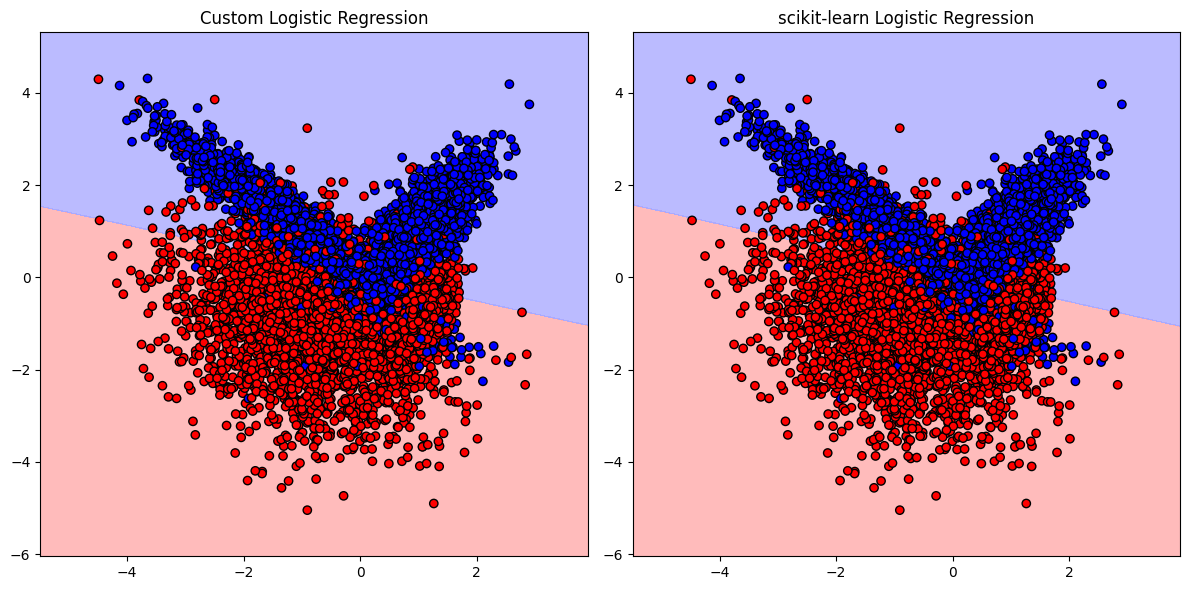

In [7]:
# Compare losses and accuracies
print("=== Loss Comparison ===")
print(f"Custom Logistic Regression Loss: {custom_loss:.4f}")
print(f"scikit-learn Logistic Regression Loss: {sklearn_loss:.4f}")

print("\n=== Accuracy Comparison ===")
print(f"Custom Logistic Regression Accuracy: {accuracy_score(y, custom_predictions):.4f}")
print(f"scikit-learn Logistic Regression Accuracy: {accuracy_score(y, sklearn_predictions):.4f}")

print("\n=== Classification Reports ===")
print("Custom Logistic Regression:\n", classification_report(y, custom_predictions))
print("scikit-learn Logistic Regression:\n", classification_report(y, sklearn_predictions))

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title, ax):
    cmap_light = ListedColormap(["#FFAAAA", "#AAAAFF"])
    cmap_bold = ["#FF0000", "#0000FF"]
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=ListedColormap(cmap_bold))
    ax.set_title(title)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_decision_boundary(custom_model, X, y, "Custom Logistic Regression", axes[0])
plot_decision_boundary(sklearn_model, X, y, "scikit-learn Logistic Regression", axes[1])
plt.tight_layout()
plt.show()

## Conclusion
### Logistic regression is a great starting point for classification problems. By implementing it from scratch, we gain deeper insights into optimization techniques and model training.

If you found this notebook helpful, please **follow and share** for better reach!

🔗 **Connect with me:**  
## - [LinkedIn](https://www.linkedin.com/in/saswattulo/)  
## - [GitHub](https://github.com/saswattulo)  
## - [Kaggle](https://www.kaggle.com/saswattulo)  

Let's build and learn together!